# Diamonds Dataset EDA
- This notebook include:
- Introduction
- Exploratory Data Analysis (EDA)
- Data Visualization
- Conclusion

### Introduction

The csv dataset contains 50.000 observation, that describes diamonds using 10 different variables, such as the cut, the carat, the depth, the color, the clarity and the price. The project starts first with an exploratory data analysis to spot the relationships in data.

### Data Dictionary:
- price: Price in US dollars ($326 – $18,823)
- carat: Weight of the diamond (0.2 – 5.01)
- cut:  Quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: Diamond colour, from D (best) to J (worst)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x: Length in mm (0 – 10.74)
- y: Width in mm (0 – 58.9)
- z: Depth in mm (0 – 31.8)
- depth: Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43–79)
- table: Width of top of diamond relative to widest point (43–95)

### Sourse of the dataset:
 - Kaggle: https://www.kaggle.com/shivam2503/diamonds


## Exploratory Data Analysis

### Import the necessary libraries

In [174]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import the dataset:

In [175]:
diamonds = pd.read_csv("data/diamonds.csv")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Explore the dataset:

In [176]:
# number of rows and columns?
diamonds.shape

(53940, 10)

In [177]:
# column names?
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [178]:
# statistical summary of the numerical variables
diamonds.describe().round()

,carat,depth,table,price,x,y,z
count,53940.0,53940.0,53940.0,53940.0,53940.0,53940.0,53940.0
mean,1.0,62.0,57.0,3933.0,6.0,6.0,4.0
std,0.0,1.0,2.0,3989.0,1.0,1.0,1.0
min,0.0,43.0,43.0,326.0,0.0,0.0,0.0
25%,0.0,61.0,56.0,950.0,5.0,5.0,3.0
50%,1.0,62.0,57.0,2401.0,6.0,6.0,4.0
75%,1.0,62.0,59.0,5324.0,7.0,7.0,4.0
max,5.0,79.0,95.0,18823.0,11.0,59.0,32.0


In [179]:
# types of values in each column
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [180]:
diamonds.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

Check for duplicate and null values:

In [181]:
# check for null values.
diamonds.isnull().sum().sum()

0

In [182]:
# check for duplicated values.
diamonds.duplicated().sum()

146

#### First Impression:
- The dataset contains 10 columns and 53940 raws.
- The dataset contains 6 float variables, 1 int variable and 3 object variables.
- The dataset dosent contain any null values. 
- The dataset have 146 duplicated values.
- x,y,z columns names need to be change to more meangful names.

### Handle duplicateds and columns rename

In [183]:
# drop duplicated values.
diamonds = diamonds.drop_duplicates()
diamonds.shape

(53794, 10)

In [184]:
# rename x,y,z and depth columns
diamonds.rename(columns={'depth':'depth_percentage','x':'length', 'y':'width','z':'depth',}, inplace=True)
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth_percentage', 'table',
       'price', 'length', 'width', 'depth'],
      dtype='object')

In [199]:
# for personal prefrance I like to rearange the columns to understand the data flow
diamonds = diamonds[['price','carat', 'cut', 'color', 'clarity','depth','length', 'width', 'depth_percentage','table']]
diamonds.head()

,price,carat,cut,color,clarity,depth,length,width,depth_percentage,table
0,326,0.23,Ideal,E,SI2,2.43,3.95,3.98,61.5,55.0
1,326,0.21,Premium,E,SI1,2.31,3.89,3.84,59.8,61.0
2,327,0.23,Good,E,VS1,2.31,4.05,4.07,56.9,65.0
3,334,0.29,Premium,I,VS2,2.63,4.20,4.23,62.4,58.0
4,335,0.31,Good,J,SI2,2.75,4.34,4.35,63.3,58.0


### Data Analysis

##### for the categorical variables we will calculate the frequency of each value in the each column

In [75]:
# Count the frequency of each value in the cut column
cuts_freq=diamonds.groupby('cut').size()
print(cuts_freq)

cut
Fair          1598
Good          4891
Ideal        21488
Premium      13748
Very Good    12069
dtype: int64


In [77]:
# Count the frequency of each value in the clarity column
clarity_freq=diamonds.groupby('clarity').size()
print(clarity_freq)

clarity
I1        740
IF       1784
SI1     13032
SI2      9150
VS1      8156
VS2     12229
VVS1     3647
VVS2     5056
dtype: int64


In [78]:
# Count the frequency of each value in the color column
color_freq=diamonds.groupby('color').size()
print(color_freq)

color
D     6755
E     9776
F     9520
G    11262
H     8272
I     5407
J     2802
dtype: int64


#### for the numerical variables we will conduct statistical analysis

In [205]:
# calculate the, min,max and price average
def maxminavg (x):
    max = diamonds[x].max()
    min = diamonds[x].min()
    averag = diamonds[x].mean()
    return print("The min", x, "is:",min ,"\nThe max",x, "is:",max ,"\nThe average", x, "is:",int(averag))

maxminavg ('price')

The min price is: 326 
The max price is: 18823 
The average price is: 3933


In [206]:
# calculate the, min,max and carat average
 maxminavg ('carat')

The min carat is: 0.2 
The max carat is: 5.01 
The average carat is: 0


In [226]:
# the averge price based on the cut
diamonds.groupby(['cut'])['price'].mean().round(2)

cut
Fair         4341.95
Good         3919.12
Ideal        3462.75
Premium      4583.50
Very Good    3981.02
Name: price, dtype: float64

In [108]:
# the averge price based on the clarity
diamonds.groupby(['clarity'])['price'].mean().round(2)

clarity
I1      3925.28
IF      2870.57
SI1     3996.17
SI2     5057.46
VS1     3841.61
VS2     3927.74
VVS1    2526.60
VVS2    3286.53
Name: price, dtype: float64

In [228]:
# the averge price based on the color
diamonds.groupby(['color'])['price'].mean().round(2)

color
D    3174.44
E    3079.61
F    3726.75
G    4001.35
H    4482.86
I    5081.75
J    5326.42
Name: price, dtype: float64

## Data Visulaztion

In [213]:
# Calculate The Cuts Frequency Percentage
diamonds['cut'].value_counts(normalize=True).mul(100).round(2).astype(str)+'%'

Ideal        39.94%
Premium      25.56%
Very Good    22.44%
Good          9.09%
Fair          2.97%
Name: cut, dtype: object

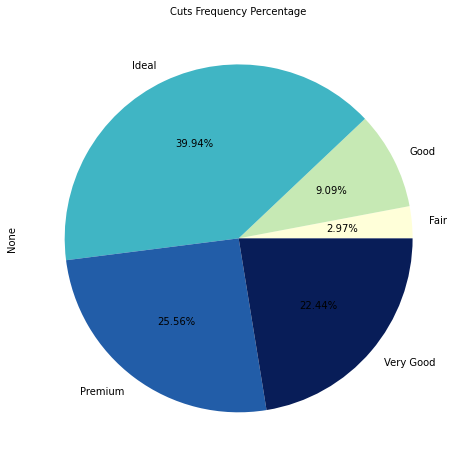

In [214]:
#The Cuts Frequency Percentage Chart
cuts_freq.plot(kind="pie",figsize=(8,8),autopct="%1.2f%%",cmap="YlGnBu")
plt.title('Cuts Frequency Percentage',fontsize=10);

In [215]:
# Calculate The Cuts Frequency Percentage
diamonds['clarity'].value_counts(normalize=True).mul(100).round(2).astype(str)+'%'

SI1     24.23%
VS2     22.73%
SI2     17.01%
VS1     15.16%
VVS2      9.4%
VVS1     6.78%
IF       3.32%
I1       1.38%
Name: clarity, dtype: object

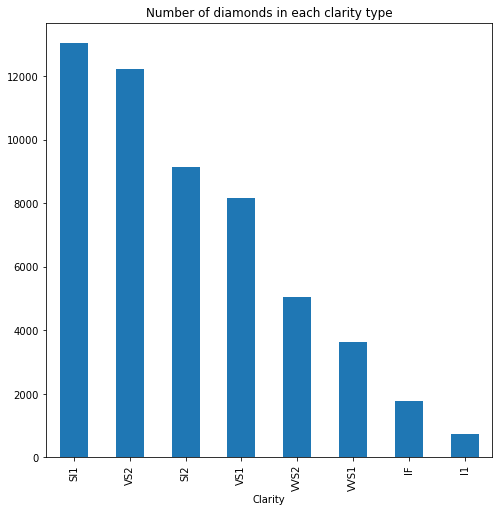

In [160]:
# Number of diamonds in each clarity type chart
clarity_freq.sort_values(ascending=False).plot(kind='bar',figsize=(8,8))
plt.title(('Number of diamonds in each clarity type'))
plt.xlabel("Clarity");

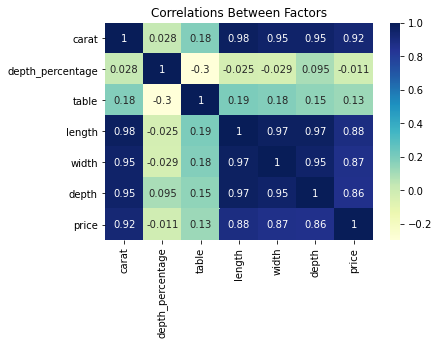

In [171]:
# Create list of Factors
factors = ['carat', 'cut', 'color', 'clarity', 'depth_percentage', 'table','length', 'width', 'depth','price']

# Find the Correlations between the factors.
corr_matrix=diamonds[factors].corr()

# Create a Chart for the 6 Factors Correlations
sns.heatmap(corr_matrix, annot = True, cmap="YlGnBu")
plt.title(('Correlations Between Factors'));

# Conclusion

- The price range is between 326$ and 18823$. 
- The Ideal quality cut is the most wanted quality cut, where it represents 39.4% of the total number of used quality cuts.
- Even though SI1 is the most Frequente clarity measurement to use SI2 has the highest price average.
- The Color G is the most demanded color, however, it still has a reasonable average price.
- The color G, SI1 clarity measurement, and Ideal quality cut represents the medium level of diamonds, which indicate that they are the most wanted 
- The price of the carat depends on three factors (length, width, depth) if they increase the carat increase and the price as well.